In [1]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Graph Formatting
sns.set_style('whitegrid') # Sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # Sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn.

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../Codes - Datasets/Churn_Modelling.csv').iloc[:, 1:]

In [3]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


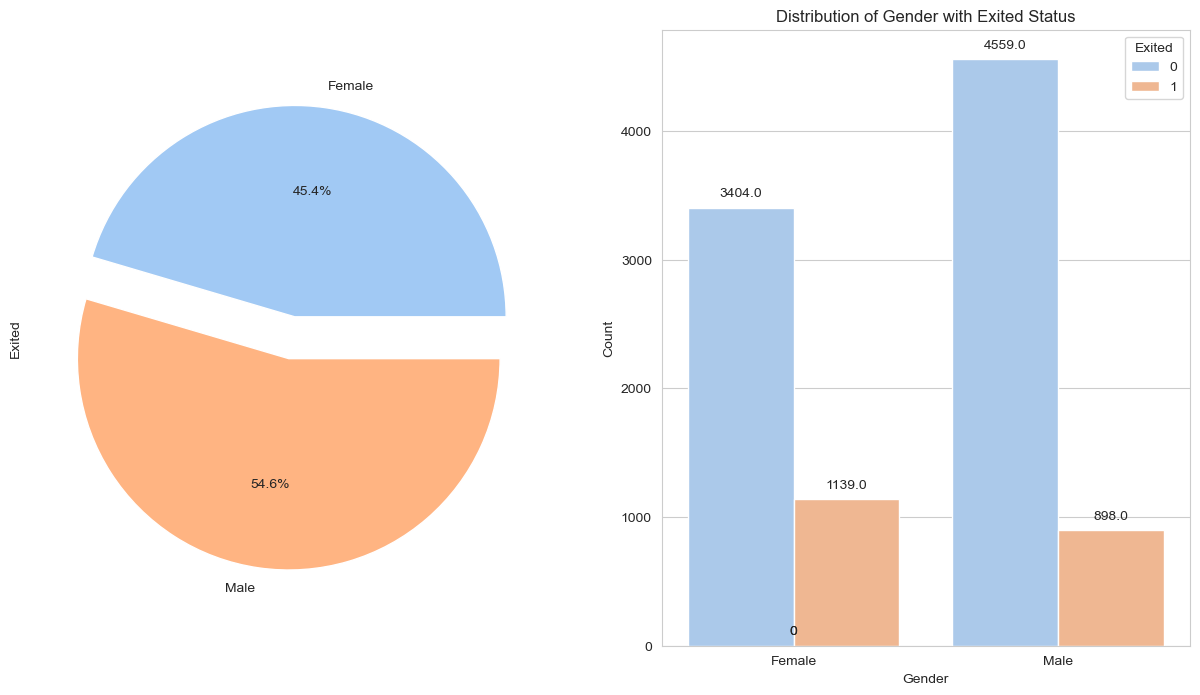

In [7]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
data.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="Gender", hue="Exited", data=data,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [13]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True, dtype = int)

In [14]:
data.head(10)

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


#### Here we donot want the surname and the customer Id since its not contributing in result that wether customer will stay or not

In [15]:
data.drop(columns = ['Surname', 'CustomerId'], inplace=True, axis = 1)

In [16]:
import matplotlib.pyplot as plt

[]

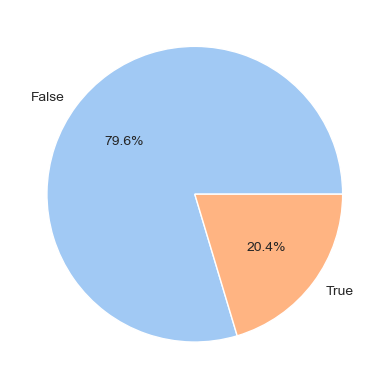

In [17]:
exited = data['Exited'].value_counts()
labels = ['False', 'True']
plt.pie(exited, labels=labels, autopct='%1.1f%%')
plt.plot()

In [18]:
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']
data.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

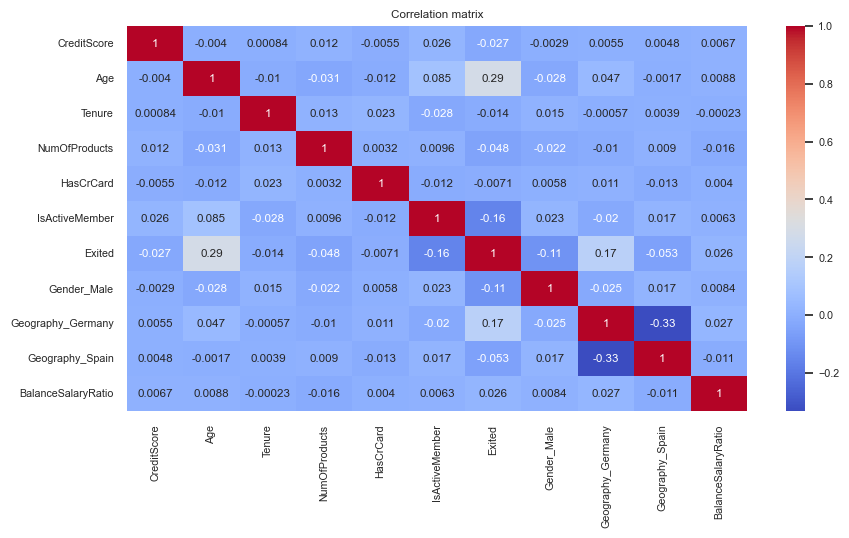

In [19]:
import seaborn as sns
corr_mat = data.corr()
plt.figure(figsize=(10, 5))
sns.set(font_scale=0.7)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [20]:
Y = data['Exited']
X = data.drop('Exited', axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
#---------------------------------------#
#           Logistic Regression         #
#---------------------------------------#

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.3f}%'.format(LR_accuracy * 100))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.59      0.21      0.31       393

    accuracy                           0.82      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.79      0.82      0.78      2000

Logistic Regression accuracy is: 81.600%


In [24]:
#---------------------------------------#
#             Random Forest             #
#---------------------------------------#

# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators = 60, random_state = 0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.3f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest model accuracy is: 86.250%


In [25]:
#---------------------------------------#
#           Gradient Boosting           #
#---------------------------------------#

gb_classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 42)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
print('XGBoost model accuracy is: {:.3f}%'.format(gb_accuracy * 100))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost model accuracy is: 86.400%


In [27]:
Algorithms = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracy = [RF_accuracy, gb_accuracy, LR_accuracy]

FinalResult = pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})
FinalResult

,Algorithm,Accuracy
0,Random Forest,0.8625
1,Gradient Boosting,0.8640
2,Logistic Regression,0.8160


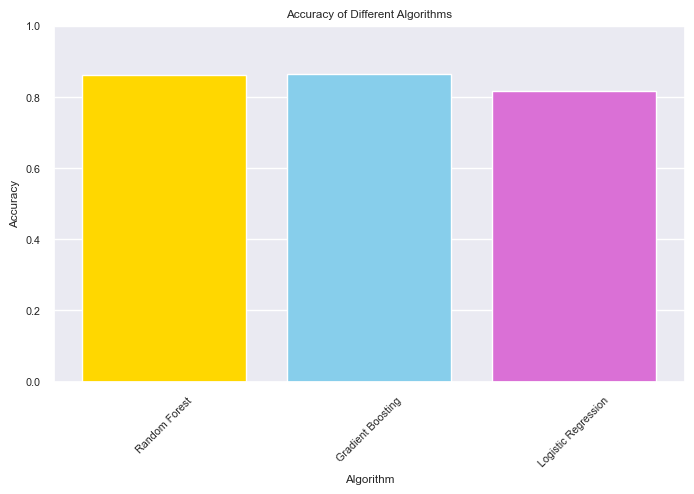

In [28]:
plt.figure(figsize=(7, 5))

# Define custom colors
colors = ['gold', 'skyblue', 'orchid']

# Plot the bar chart with custom colors
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation = 45)
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()